In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from numpy.fft import fft
from numpy import reshape, r_, mean
from scipy.stats import mode
import bitarray
import sounddevice as sd
from fractions import gcd
from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from numpy import ones
from scipy import signal
from scipy import integrate
from functools import reduce

import sounddevice as sd
%matplotlib inline

In [2]:
def avgPS( x, N=256, fs=1):
    M = int(len(x)//N)
    x_ = reshape(x[:M*N],(M,N)) * np.hamming(N)[None,:]
    X = np.fft.fftshift(np.fft.fft(x_,axis=1),axes=1)
    return r_[-N/2.0:N/2.0]/N*fs, mean(abs(X**2),axis=0)


def sg_plot( t_range, f_range, y, dbf = 60) :
    eps = 1e-3
    
    # find maximum
    y_max = abs(y).max()
    # compute 20*log magnitude, scaled to the max
    y_log = 20.0 * np.log10( abs( y ) / y_max + eps )
    
    fig=plt.figure(figsize=(15,6))
    
    plt.imshow( np.flipud( 64.0*(y_log + dbf)/dbf ), extent= t_range  + f_range ,cmap=plt.cm.gray, aspect='auto')
    plt.xlabel('Time, s')
    plt.ylabel('Frequency, Hz')
    plt.tight_layout()


def myspectrogram_hann_ovlp(x, m, fs, fc,dbf = 60):
    # Plot the spectrogram of x.
    # First take the original signal x and split it into blocks of length m
    # This corresponds to using a rectangular window %
    

    isreal_bool = np.isreal(x).all()
    
    # pad x up to a multiple of m 
    lx = len(x);
    nt = (lx + m - 1) // m
    x = np.append(x,zeros(-lx+nt*m))
    x = x.reshape((m//2,nt*2), order='F')
    x = np.concatenate((x,x),axis=0)
    x = x.reshape((m*nt*2,1),order='F')
    x = x[r_[m//2:len(x),ones(m//2)*(len(x)-1)].astype(int)].reshape((m,nt*2),order='F')
    
    
    xmw = x * hanning(m)[:,None];
    
    
    # frequency index
    t_range = [0.0, lx / fs]
    
    if isreal_bool:
        f_range = [ fc, fs / 2.0 + fc]
        xmf = np.fft.fft(xmw,len(xmw),axis=0)
        sg_plot(t_range, f_range, xmf[0:m//2,:],dbf=dbf)
        print(1)
    else:
        f_range = [-fs / 2.0 + fc, fs / 2.0 + fc]
        xmf = np.fft.fftshift( np.fft.fft( xmw ,len(xmw),axis=0), axes=0 )
        sg_plot(t_range, f_range, xmf,dbf = dbf)
    
    return t_range, f_range, xmf

def lcm(numbers):
    return reduce(lambda x, y: (x*y)//gcd(x,y), numbers, 1)

In [99]:
bits = bitarray.bitarray((np.random.rand(128)>0.5).tolist())

In [ ]:
#00 => 0 degree phase shift 
#01 => 90 degree phase shift
#10 => 180 degree phase shift 
#11 => 270 degree phase shift 

#00 => 0 
#01 => pi/2
#10 => pi
#11 => 3pi/2 
#Basically shifts the bit sequence into one that models the phase differences 
def diff_encode(bits):
    

In [141]:
#assumes signal has already been decomposed into appropriate bits
def qpsk_modulate(bits, baud, fs, fc=2400):
    print(bits[0], bits[1])
    ibits = bits[::2] #in phase bits
    qbits = bits[1::2] #quadrature bits
    bit_length = fs//baud
    num_samples_i = bit_length * len(ibits)
    num_samples_q = bit_length * len(qbits)
    mi = np.zeros(num_samples_i)
    cur_idx = 0   
    mq = np.zeros(num_samples_q)

    for bit in ibits: 
        for _ in range(0, bit_length):
            mi[cur_idx] = 2 * bit - 1
            cur_idx += 1
            
    cur_idx = 0
    for bit in qbits: 
        for _ in range(0, bit_length):
            mq[cur_idx] = 2 * bit - 1
            cur_idx += 1
    #TODO: figure out appropriate behavior in this case 
    if len(mq) != len(mi):
        mq = np.concatenate(mq, np.zeros(len(mq) - max(len(mq), len(mi))))
        mi = np.concatenate(mi, np.zeros(len(mi) - max(len(mq), len(mi))))
    plt.plot(mq[0:100])
    plt.show()
    t = np.linspace(0, len(mi), len(mi))
    phi1 = np.cos(2 * np.pi * t/fs)
    phi2 = np.sin(2 * np.pi * t/fs)
    q_sig = phi2 * mq
    i_sig = phi1 * mi
    plt.show()

    plt.figure()
    fig, ax = plt.subplots()
    #ax.scatter(i_sig[bit_length//2], q_sig[bit_length//2])
    ax.scatter(i_sig[bit_length//2::bit_length], q_sig[bit_length//2::bit_length])
    plt.xlim((-2,2))
    plt.ylim((-2,2))

    plt.show()
    #plt.plot(i_sig[:bit_length * 2])
    plt.plot(q_sig[0:bit_length])
    plt.show()
    print(bit_length//2)
    return (i_sig + q_sig)

0 0


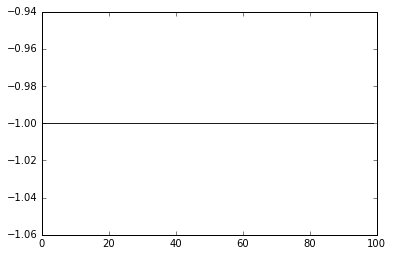

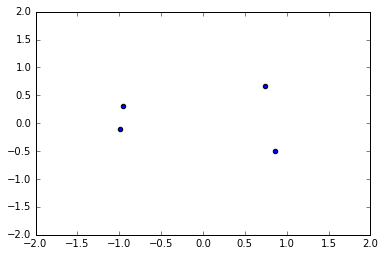

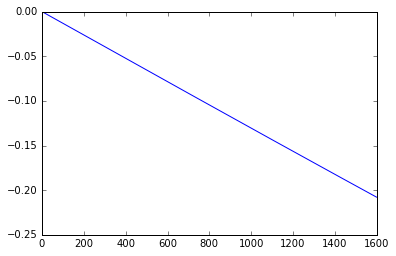

800
0 0


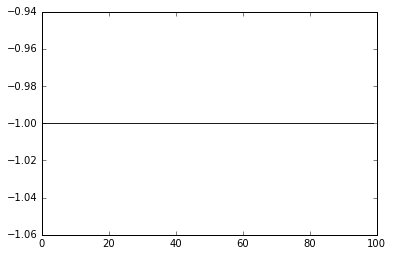

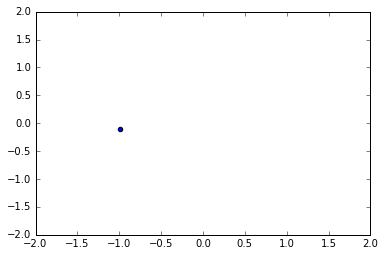

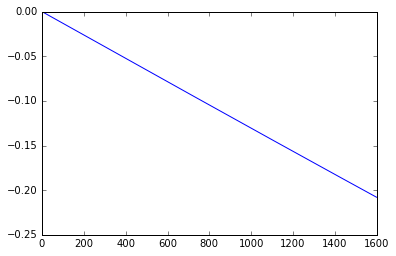

800


In [142]:
modded_sig = qpsk_modulate([0, 0, 0, 1, 1, 0, 1, 1], 30, 48000, fc=2400)
modded_sig_2 = qpsk_modulate([0, 0], 30, 48000, fc=2400)
# plt.figure()
# fig, ax = plt.subplots()
# ax.scatter(np.real(modded_sig), np.imag(modded_sig))
# plt.show()

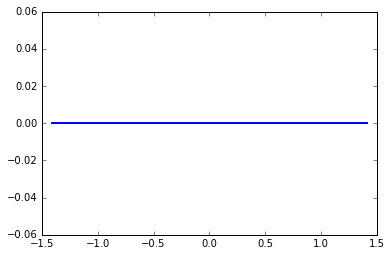

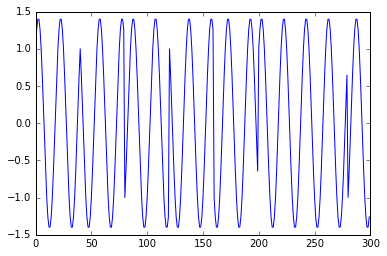

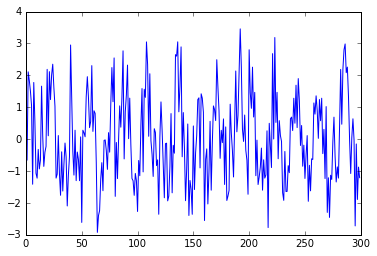

In [40]:
noise = np.random.randn(len(modded_sig))*1
modded_sig_noise = modded_sig + noise
plt.plot(modded_sig[0:300])
plt.figure()
plt.plot(modded_sig_noise[0:300])

In [11]:
print(bits)

bitarray('101110101011001010011111101001111010100000001000110101010001111100101001010100100110000011001110000100100101000000010100101000000011110111000111000010100000100110110110110000010000111100110100100111101011110001010001100110100010010100001001011101011010010100000011101010001111111000011101111100110011000011010111010000001000010111001000110000100100010111011111110010010111001101011001111011100000110110000111001011011101010101011110110101111100000101000010111000000100011100000110101010101001010110111001100111001101110000010000001001010010011011001110110110001101111000000100010000000110110001010101111010111001011011010010100111010011110101010110101011101101001101011010010011001011010001110111100011011001010101001000000101101111110000001011100101110001011011110011110100111001010000011000111101110111011100001011000101110101111100110000100000100000000101011011010110111110000100011001110001110001110111010111101001001011110101111010101001100110101000101110001100100110010111110010110000

In [102]:
rec_sig = sd.playrec(modded_sig, channels = 1)
sd.wait()
rec_sig = rec_sig.reshape(1, len(rec_sig))[0]
print(rec_sig)

[ 0.          0.          0.         ...,  1.69097471  0.67757332
 -0.42496204]


In [103]:
def qpsk_demodulate(rcv_signal, baud, fs, fc=2400):
    bit_length = fs//baud
    t = np.linspace(0, len(rcv_signal), len(rcv_signal))
    cos_sig = 2 * np.cos(2 * np.pi * fc/fs * t)
    sin_sig = 2 * np.sin(2 * np.pi * fc/fs * t)
    #lpf = signal.firwin(2/baud * fs + 1, 2 * 2400/fs)
    #sig_i = np.abs(np.convolve(rcv_signal * cos_sig, lpf, mode = "same"))
    #sig_q = np.abs(np.convolve(rcv_signal * sin_sig, lpf, mode="same"))
    sig_i = rcv_signal * cos_sig
    sig_q = rcv_signal * sin_sig
#     plt.title("inphase component (even bits)")
#     plt.plot(sig_i[100:200])
#     plt.figure()
#     plt.title("quad component (odd bits)")
#     plt.plot(sig_q[100:200])
    sig_i = np.sign(sig_i)
    sig_q = np.sign(sig_q)
    print(len(sig_i)//bit_length)
    print(len(sig_q)//bit_length)
    comp_sig_i = []
    for i in range(bit_length, len(sig_i)+1, bit_length):
        comp_sig_i.append((int(mode(sig_i[i-bit_length:i], axis=None)[0][0]) + 1)//2)
    comp_sig_q = []
    for i in range(bit_length, len(sig_q)+1, bit_length):
        comp_sig_q.append((int(mode(sig_q[i-bit_length:i], axis=None)[0][0]) + 1)//2)
    print(len(comp_sig_i))
    print(len(comp_sig_q))
    added_bitstream = []
    for i in range(0, len(comp_sig_i) + len(comp_sig_q)):
        if i%2 == 0:
            added_bitstream.append(comp_sig_i[i//2])
        else:
            added_bitstream.append(comp_sig_q[i//2])
    return added_bitstream

In [104]:
sig = qpsk_demodulate(rec_sig, 600, 48000, fc=2400)

1280
1280
1280
1280


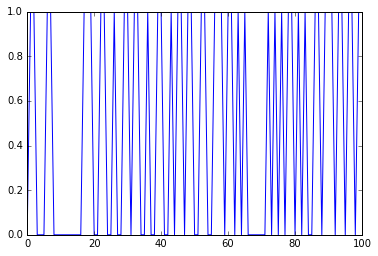

In [17]:
plt.plot(sig[100:200])

In [15]:
print(sig)
print(len(sig))

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [105]:
flag = True
for i in range(len(sig)):
    if sig[i] != bits[i]:
        print(i)
        flag = False
print(flag)

0
5
7
9
10
12
14
16
20
22
23
24
25
26
27
29
33
36
37
38
40
41
42
48
56
57
59
62
65
67
68
69
71
72
75
76
81
82
83
85
89
90
93
98
101
102
103
104
105
106
108
111
113
114
117
121
123
124
125
126
127


IndexError: bitarray index out of range

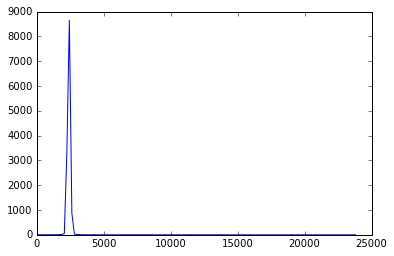

In [106]:
freqs, f = avgPS(modded_sig, N=256, fs=48000)
plt.plot(freqs[len(freqs)/2:], f[len(f)/2:])

In [5]:
preamble = np.array(bitarray.bitarray((np.random.rand(50)>0.5).tolist())).astype(int)
bits = bitarray.bitarray((np.random.rand(128)>0.5).tolist())
bits = np.append(preamble, np.array(bits).astype(int))

##AFSK function definitions

In [40]:
#Now trying AFSK 
#with a center frequency of 1800, for 2400 baud, we can get two frequencies of 1000 Hz and 2400 Hz 
def afsk_mod(bits, fc, df, baud, fs):
    fs_eff = lcm((fs, baud))
    bit_length = fs_eff//baud #Each bit's duration is the sampling rate (samples/s) / (bits/s) => samples/bit
    num_samples = bit_length * len(bits) #The total number of samples is the bit length * # bits
    tot_time = num_samples/fs_eff #converts samples to time using sample rate
    #change the bitstream to be between -1 and 1 instead of 0 and 1
    m = np.zeros(num_samples)
    #Expands the bitstream to its full length, basically inserting bit_length copies of each bit into the stream
    cur_idx = 0
    for bit in bits:
        for i in range(0, bit_length): 
            if bit == 1:
                m[cur_idx] = bit
            if bit == 0 or bit == -1:
                m[cur_idx] = -1
            cur_idx += 1
    t = np.linspace(0, tot_time, num_samples) #time indices for the inte gration
    func = lambda time: m[time]
    integrated = np.array(integrate.cumtrapz(m, t, initial=0)) #integrat es over m to ensure smooth frequency transitions
    sig = np.cos(2*np.pi*fc*t + 2*np.pi*df*integrated) #The actual si gnal is a series of cosines at 1200 Hz and 2200 Hz
    sig = sig[::fs_eff//fs] 
    return sig

def afsk_demod(sig, fc, df, baud, fs=48000, TBW=2):
    #  non-coherent demodulation of afsk1200
    # function returns the NRZ (without rectifying it)
    # 
    # sig  - signal
    # baud - The bitrate. Default 1200
    # fs   - sampling rate in Hz
    # TBW  - TBW product of the filters
    #
    # Returns:
    #     NRZ 
    t = np.linspace(0, TBW/1200*fs+1, TBW/1200*fs+1)
    bp1 = signal.firwin(TBW/1200*fs+1, 2*(baud)/fs) * np.exp(2 * np.pi * 1j* (fc - df)/fs*t)
    bp2 = signal.firwin(TBW/1200*fs+1, 2*(baud)/fs) * np.exp(2 * np.pi * 1j* (fc + df)/fs*t)
    lpf = signal.firwin(TBW/1200*fs+1, 2*(baud*1.2)/fs)
    sig_mark = np.abs(np.convolve(sig, bp1, mode="same"))
    sig_space = np.abs(np.convolve(sig, bp2, mode="same"))
    nrz = np.convolve(-sig_mark + sig_space, lpf, mode="same") 
    return nrz

def PLL(NRZa, a = 0.74 , fs = 48000, baud = 1200): 
    # function implements a simple phased lock loop for tyming recovery
    #
    # Inputs:
    #          NRZa -   The NRZ signal
    #          a - nudge factor
    #          fs - sampling rate (arbitrary)
    #          baude  - the bit rate
    #
    # Outputs:
    # idx - array of indexes to sample at #
    tick = (2**32)//(fs//baud)
    pll = np.int32(0)
    idx = []
    for i in range(0, len(NRZa)):
        if i != 0 and np.sign(NRZa[i-1]) != np.sign(NRZa[i]): #zero cros
            pll = np.int32(pll * a)
        tmp = pll
        pll = np.int32(np.int32(pll)+np.int32(tick)) 
        if (pll < tmp):
            idx.append(i) #this is a sample since the pll has overflowed
    return idx

##Channel simulation - HOOTL Test

In [86]:
TBW=2
fs=48000
fc = 1700
df = 500
baud = 1200 

num_taps = np.floor((TBW/1200*fs+1)).astype(int)
t = np.linspace(0, num_taps, num_taps)
h_bp = signal.firwin(num_taps, (1000)/fs) * np.exp(2 * np.pi *1j* 2000/fs*t)

In [87]:
preamble = np.array(bitarray.bitarray((np.random.rand(50)>0.5).tolist())).astype(int)
bits = bitarray.bitarray((np.random.rand(128)>0.5).tolist())
bits = np.append(preamble, np.array(bits).astype(int))
bits_lock = np.append(np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]), bits)
print(preamble)
print(bits_lock)
sig_tx = afsk_mod(bits_lock, fc, df, baud, fs=fs)
#sig_tx_padded = 0.8*np.concatenate((sig_tx,np.zeros(fs//2)))

[1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1
 0 0 1 0 1 0 0 1 1 0 1 0 1]
[0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0
 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1
 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1
 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1
 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1
 1 1 0 0]


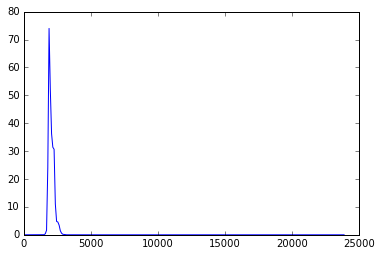

1294
[ 1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
0
4
6
8
13
14
21
22
23
26
30
36
37
39
41
42
43
46
48
49
50
51
53
54
57
58
59
61
62
63
65
66
67
70
71
72
79
80
85
87
92
93
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
False


/Users/Hersh/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:64: RuntimeWarning: overflow encountered in int_scalars


In [91]:
#sig_rx = np.concatenate((np.zeros(12000), sig_tx_padded, np.zeros(12000)))
sig_rx = np.convolve(sig_rx, h_bp, mode = 'same')

# w, resp = signal.freqz(sig_tx)
# w = w * fs/np.pi
# plt.figure(figsize = (16,4))
# plt.plot(w[0:100], np.abs(resp[0:100]))
# plt.show()
#sig_rx = sig_rx + 0.1*np.random.randn(len(sig_rx))
freqs, f = avgPS(sig_rx, N=512, fs=48000)
plt.plot(freqs[len(freqs)/2:], f[len(f)/2:])
plt.show()

rcv_sig_nrz = (afsk_demod(sig_rx, fc, df, baud))
samp_indices = PLL(rcv_sig_nrz, baud=baud)
rcv_sig_samp = rcv_sig_nrz[samp_indices]
print(len(rcv_sig_samp))
rcv_sig = (np.sign(rcv_sig_samp) + 1)/2
corrs = np.correlate(rcv_sig, preamble)
rcv_sig = rcv_sig[np.argmax(corrs):]
print(rcv_sig[:len(preamble)])
flag = True
for i in range(min(len(rcv_sig), len(bits_lock))):
    if rcv_sig[i] != bits_lock[i]:
        print(i)
        flag = False
print(flag)

##AFSK on laptop test 

In [7]:
bits_lock = np.append(np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]), bits)
modded_sig = afsk_mod(bits_lock, 3067, 902, 2400, fs=48000)

In [8]:
rcv_sig_nrz = (afsk_demod(modded_sig, 3067, 902, 2400))

/Users/Hersh/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:77: RuntimeWarning: overflow encountered in int_scalars


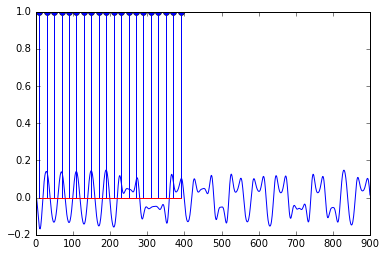

In [9]:
samp_indices = PLL(rcv_sig_nrz, baud=2400)
plt.figure()
plt.plot(rcv_sig_nrz[0:900])
plt.stem(samp_indices[0:20], np.ones(20))
rcv_sig_samp = rcv_sig_nrz[samp_indices]

189


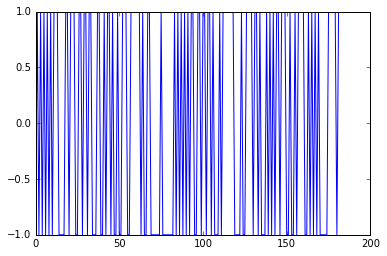

In [10]:
plt.plot(np.sign(rcv_sig_samp))
print(len(rcv_sig_samp))

In [11]:
rcv_sig = (np.sign(rcv_sig_samp) + 1)/2
print(len(rcv_sig))
#print(rcv_sig[11:61])
print(preamble)
start_idx = np.correlate(rcv_sig, preamble)
print((start_idx))
print(rcv_sig[np.argmax(start_idx):])
rcv_sig = rcv_sig[np.argmax(start_idx):]

189
[1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0
 0 1 0 0 1 1 1 0 0 1 1 1 1]
[ 18.  14.  13.  17.  12.  16.  15.  13.  15.  11.  15.  28.  16.  12.  16.
  14.  16.  15.  14.  19.  15.  15.  18.  11.   9.  15.  16.  15.  12.  11.
  12.  13.  12.  11.  12.  11.  13.  13.  12.  10.  11.  14.  17.  13.  11.
  14.  14.  11.  12.  13.  13.  14.  16.  13.  11.  11.  14.  15.  11.  13.
  12.  11.  10.  11.  11.  13.  12.  15.  16.  11.  11.  15.  12.  12.  13.
  15.  12.  13.  12.  15.  15.  14.  18.  17.  14.  20.  16.  13.  15.  13.
  14.  18.  13.  16.  15.  13.  20.  16.  14.  18.  15.  16.  18.  13.  14.
  16.  16.  15.  14.  13.  17.  16.  17.  15.  15.  15.  19.  17.  13.  14.
  13.  13.  16.  12.  11.  13.  16.  16.  15.  14.  17.  14.  15.  17.  16.
  13.  17.  20.  16.  16.]
[ 1.  1.  1.  0.  0.  0.  0.  1.  1.  0.  1.  1.  1.  0.  0.  1.  1.  0.
  1.  1.  0.  1.  1.  0.  0.  0.  1.  1.  0.  0.  1.  0.  1.  1.  0.  1.
  0.  0.  1.  0.  0.  1.  1.  1.  0.

In [12]:
flag = True
for i in range(len(rcv_sig)):
    if rcv_sig[i] != bits[i]:
        print(i)
        flag = False
print(flag)

True


##AFSK in loopback mode 

In [4]:
sd.query_devices()

> 0 Built-in Microphone, Core Audio (2 in, 0 out)
< 1 Built-in Output, Core Audio (0 in, 2 out)
  2 USB PnP Sound Device, Core Audio (1 in, 2 out)

In [51]:
fs = 48000
fc = 1700
df = 500
baud = 300

[0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1
 1 0 1 0 1 0 0 1 1 1 1 1 0]
352000


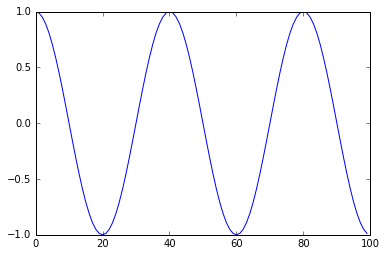

In [52]:
preamble = np.array(bitarray.bitarray((np.random.rand(50)>0.5).tolist())).astype(int)
print(preamble)
bits = bitarray.bitarray((np.random.rand(128)>0.5).tolist())
bits_preamble = np.append(preamble, np.array(bits).astype(int))
bits_lock = np.append(np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]), bits_preamble)
#print(bits_lock)
modded_sig = afsk_mod(np.append(np.zeros(2000), bits_lock), fc, df, baud, fs) #pad the bitstream
print(len(modded_sig))
plt.plot(modded_sig[0:100])

In [53]:
rcv_sig_sd = sd.playrec(modded_sig * 0.05, device=2, samplerate=48000, channels=1)
sd.wait()
rcv_sig_sd = rcv_sig_sd.reshape(1, len(rcv_sig_sd))[0]

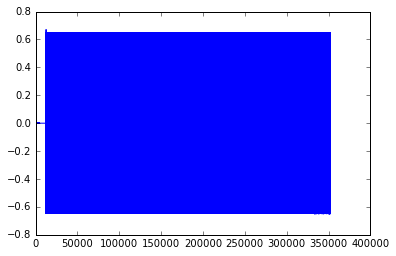

In [54]:
plt.plot(rcv_sig_sd)
plt.show()

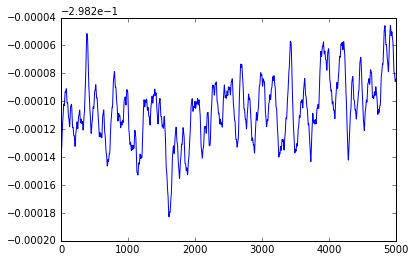

2199
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  1.
  1.  0.  1.  0.  1.  0.  0.  1.  1.  0.  1.  1.  1.  1.  1.  0.  1.  1.
  1.  1.  0.  1.  0.  1.  0.  0.  1.  1.  1.  1.  1.  0.]
1
3
4
5
7
9
10
13
18
19
20
21
22
25
28
29
30
31
33
34
35
36
40
41
42
45
46
51
54
58
60
63
65
66
69
71
72
77
80
83
84
86
87
89
91
92
93
94
95
97
False


/Users/Hersh/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:64: RuntimeWarning: overflow encountered in int_scalars


In [55]:
rcv_sig_nrz = (afsk_demod(rcv_sig_sd, fc, df, baud))
plt.plot(rcv_sig_nrz[20000:25000])
plt.show()
samp_indices = PLL(rcv_sig_nrz, baud=baud)
rcv_sig_samp = rcv_sig_nrz[samp_indices]
print(len(rcv_sig_samp))
rcv_sig = (np.sign(rcv_sig_samp) + 1)/2
corrs = np.correlate(rcv_sig, preamble)
rcv_sig = rcv_sig[np.argmax(corrs):]
print(rcv_sig[:len(preamble)])
flag = True
for i in range(len(rcv_sig)):
    if rcv_sig[i] != bits_lock[i]:
        print(i)
        flag = False
print(flag)

In [22]:
fs = 48000
baud = 300
num_samples = fs//baud * len(preamble) #The total number of samples is the bit length * # bits
tot_time = num_samples/fs #converts samples to time using sample rate
#change the bitstream to be between -1 and 1 instead of 0 and 1
exp_preamble = np.zeros(num_samples)
#Expands the bitstream to its full length, basically inserting bit_length copies of each bit into the stream
cur_idx = 0
for bit in preamble:
    for i in range(0, fs//baud): 
        if bit == 1:
            exp_preamble[cur_idx] = bit
        if bit == 0 or bit == -1:
            exp_preamble[cur_idx] = -1
        cur_idx += 1

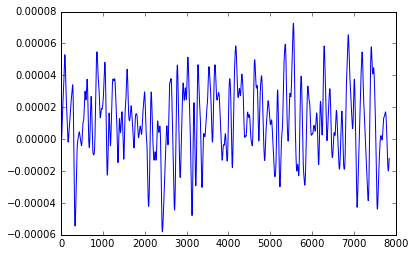

50
2
10
12
13
14
15
16
17
22
25
27
28
29
31
32
33
34
35
37
41
43
44
47
False


/Users/Hersh/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:77: RuntimeWarning: overflow encountered in int_scalars


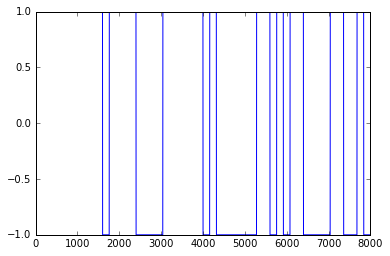

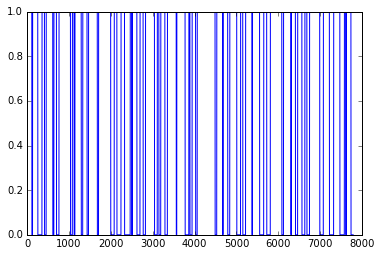

In [23]:
rcv_sig_nrz = afsk_demod(rcv_sig_sd, 1700, 500, 300)
plt.plot(rcv_sig_nrz)
plt.show()
plt.figure()
rcv_sig_nrz = (np.sign(rcv_sig_nrz) + 1)/2
plt.figure()
plt.plot(exp_preamble)
#print(np.argmax((np.correlate(exp_preamble, rcv_sig_exp))))
start_idx = np.argmax((np.correlate(exp_preamble, rcv_sig_nrz)))
print(start_idx)
rcv_sig_nrz = rcv_sig_nrz[start_idx:]
plt.figure()
plt.plot(rcv_sig_nrz[:len(exp_preamble)])
rcv_sig_samp = rcv_sig_nrz[PLL(rcv_sig_nrz, a=0.5, baud=300)]
#print(len(rcv_sig_samp))
#rcv_sig = (np.sign(rcv_sig_samp) + 1)/2
# start_idx = np.correlate(preamble, rcv_sig)
# print(start_idx)
# rcv_sig = rcv_sig[np.argmax(start_idx):]
#print(len(rcv_sig))
flag = True
for i in range(len(rcv_sig_samp)):
    if rcv_sig_samp[i] != bits_preamble[i]:
        print(i)
        flag = False
print(flag)

##Test Soundcard

In [3]:
sd.query_devices()

> 0 Built-in Microphone, Core Audio (2 in, 0 out)
< 1 Built-in Output, Core Audio (0 in, 2 out)
  2 USB PnP Sound Device, Core Audio (1 in, 2 out)

In [ ]:
fs = 48000
t = np.linspace(0, 5*fs, 5*fs)
tone = np.sin()